In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1

Elija una de las imágenes color que tomó para la clase y aplique separación de canales y 
elija un método para transformarla en escala de grises. Muestre por pantalla los resultados obtenidos. 

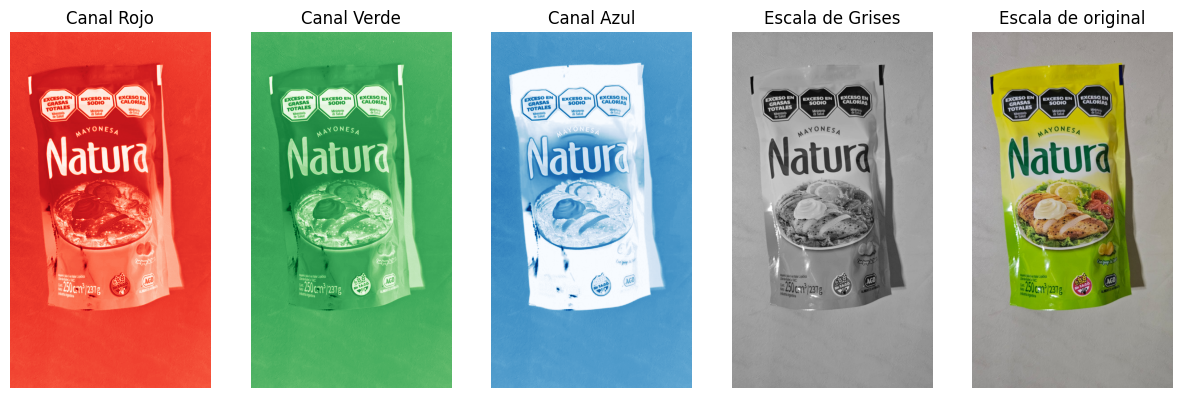

In [4]:
image = cv2.imread('imagenes/1.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')
axs[0].axis('off')
axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')
axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')
axs[3].imshow(image_gray, cmap='gray')
axs[3].set_title('Escala de Grises')
axs[3].axis('off')
axs[4].imshow(image_rgb)  # Normaliza los valores de píxeles al rango [0, 1]
axs[4].set_title('Escala de original')
axs[4].axis('off')
plt.show()


# Ejericio 2

Con las fotografías pedidas por la cátedra la clase pasada (la foto de objetos con fondo liso, y
 fotos del mismo producto en un contexto más complejo) usar los métodos de extracción de 
 características (esos anteriores al Deep Learning) para encontrar la ubicación del producto dentro de la imagen.

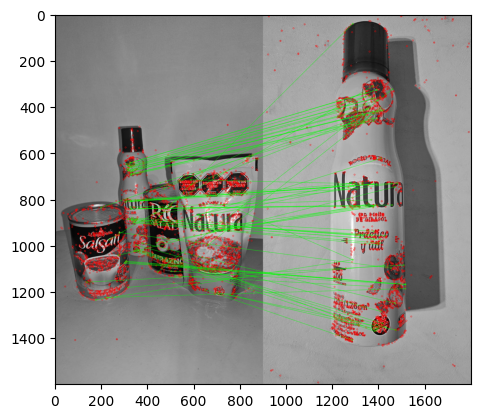

(<matplotlib.image.AxesImage at 0x12f1864a0>, None)

In [10]:
# Cargar imágenes en escala de grises
img1 = cv.imread('imagenes/7.jpeg', cv.IMREAD_GRAYSCALE)          # Imagen de consulta (queryImage)
img2 = cv.imread('imagenes/2.jpeg', cv.IMREAD_GRAYSCALE) # Imagen de entrenamiento (trainImage)

# Iniciar el detector SIFT
sift = cv.SIFT_create()

# Encontrar los keypoints y descriptores con SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Parámetros FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # o pasar un diccionario vacío

# Iniciar FLANN matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

# Realizar emparejamientos kNN
matches = flann.knnMatch(des1, des2, k=2)

# Necesitamos dibujar solo los buenos emparejamientos, por lo que creamos una máscara
matchesMask = [[0, 0] for i in range(len(matches))]

# Test de proporción según el artículo de Lowe (https://www.robots.ox.ac.uk/~vgg/research/affine/det_eval_files/lowe_ijcv2004.pdf)
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Parámetros de dibujo para los emparejamientos
draw_params = dict(matchColor=(0, 255, 0),  # color de los emparejamientos
                   singlePointColor=(255, 0, 0),  # color de los puntos individuales
                   matchesMask=matchesMask,  # máscara para seleccionar emparejamientos
                   flags=cv.DrawMatchesFlags_DEFAULT)

# Dibujar los emparejamientos kNN
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

# Mostrar la imagen resultante
plt.imshow(img3), plt.show()

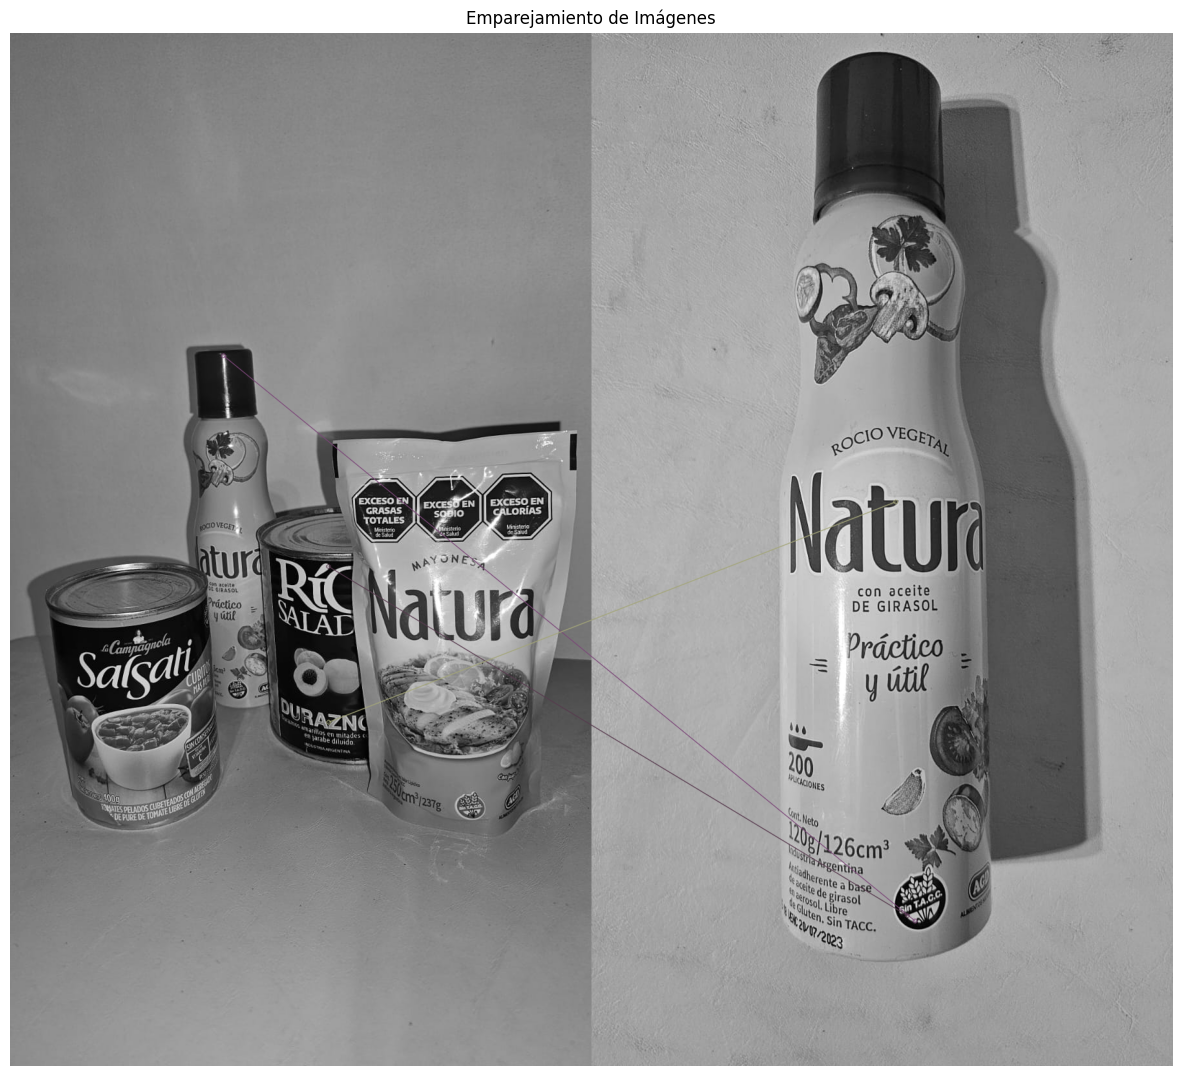

In [6]:
# Cargar las imágenes
image1 = cv2.imread('imagenes/7.jpeg', cv2.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a tu imagen
image2 = cv2.imread('imagenes/2.jpeg', cv2.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a otra imagen

# Inicializar ORB
orb = cv2.ORB_create()

# Detectar keypoints y calcular descriptores
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Crear un objeto BFMatcher para encontrar las coincidencias
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontrar coincidencias
matches = bf.match(descriptors1, descriptors2)

# Ordenar las coincidencias en orden de distancia (cuanto más baja, mejor)
matches = sorted(matches, key=lambda x:x.distance)

# Dibujar las primeras 15 coincidencias
matched_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:3], outImg=None, flags=2)

# Ajustar el tamaño de la figura de matplotlib
plt.figure(figsize=(15, 20))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Emparejamiento de Imágenes')
plt.axis('off')
plt.show()

# Ejercicio 4

Con los videos de youtube.com de cámara fija pedidos para esta clase, aplicar los algoritmos de detección de movimiento vistos en la teoría

In [8]:
ap = cv2.VideoCapture('videos/1.mp4')  
backSub = cv2.createBackgroundSubtractorMOG2(detectShadows=False)

max_height = 480

while True:
    ret, frame = ap.read()        

    # Verifica si se ha leído correctamente un fotograma
    if not ret:
        break

    height, width = frame.shape[:2]
    ratio = max_height / height
    new_width = int(width * ratio)
    new_height = int(height * ratio)
    
    # Redimensiona el fotograma manteniendo la relación de aspecto
    frame_resized = cv2.resize(frame, (new_width, new_height))

    fgMask = backSub.apply(frame_resized)
        
    cv2.imshow('original', frame_resized)    
    cv2.imshow('foregroundMask', fgMask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

ap.release()
cv2.destroyAllWindows()

2024-04-10 22:52:19.848 Python[60394:1200759] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [6]:
def draw_contours(image, contours):
    """
    Dibuja cuadros delimitadores alrededor de los contornos en una imagen.
    """
    result_image = image.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return result_image

def process_frame_difference_full(new_image, prev_image, **kwargs):
    """
    Procesa la diferencia entre dos fotogramas consecutivos.
    """
    # Convertir las imágenes a escala de grises
    new_gray = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
    prev_gray = cv2.cvtColor(prev_image, cv2.COLOR_RGB2GRAY)

    # Calcular la diferencia absoluta entre los fotogramas actual y anterior
    frame_diff = cv2.absdiff(new_gray, prev_gray)

    # Normalizar la imagen de diferencia
    norm_diff = cv2.normalize(frame_diff, None, 0, 255, cv2.NORM_MINMAX)

    # Umbralizar la imagen para resaltar las diferencias
    _, thresh = cv2.threshold(norm_diff, 30, 255, cv2.THRESH_BINARY)

    # Dilatar la imagen umbralizada para mejorar la detección de contornos
    kernel = np.ones((5,5),np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations=1)

    # Convertir la imagen dilatada a formato adecuado para findContours
    dilated = dilated.astype(np.uint8)

    # Encontrar contornos en la imagen dilatada
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar cuadros delimitadores alrededor de los contornos
    if kwargs.get('draw_mode', 0) == 0:
        result_image = draw_contours(new_image, contours)
    elif kwargs.get('draw_mode', 0) == 1:
        result_image = draw_contours(thresh, contours)

    return result_image

In [14]:
video_capture = cv2.VideoCapture('videos/1.mp4')
# Lee el primer fotograma
prev_frame = None
ret, prev_frame = video_capture.read()
# Itera sobre los fotogramas restantes
while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    # Procesa la diferencia entre fotogramas
    processed_frame = process_frame_difference_full(frame, prev_frame)
    # Muestra el fotograma procesado
    cv2.imshow('Processed Frame', processed_frame)
    # Sale del bucle si se presiona la tecla 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    # Actualiza el fotograma anterior
    prev_frame = frame.copy()
# Libera los recursos y cierra las ventanas
video_capture.release()
cv2.destroyAllWindows()

# Ejercicio 5
(Entrega obligatoria individual en repo) Genere un video en un patio o en un hall de edificio donde en un principio se vea vacío y luego aparezca una persona. Mediante los métodos de motion detection (sin usar deep learning) logre una detección de la persona cuando entra al cuadro suponiendo la utilidad para una cámara de seguridad. 
Luego sobre el mismo video aplique los algoritmos de flujo denso y disperso que se mostraron en clase. 
Escriba una reflexión sobre los resultados en el formato md dentro del Jupyter Notebook.

In [3]:
import cv2
import numpy as np

def process_dense_optical_flow(new_image, prev_image):
    # Convierte la nueva imagen a escala de grises
    gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    if not hasattr(process_dense_optical_flow, "init_done"):
        process_dense_optical_flow.prev_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
        process_dense_optical_flow.mask = np.zeros_like(new_image)
        process_dense_optical_flow.mask[..., 1] = 255
        process_dense_optical_flow.init_done = True

    if process_dense_optical_flow.init_done:
        prev_gray = process_dense_optical_flow.prev_gray
        mask = process_dense_optical_flow.mask

    # Calcula el flujo óptico
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Computa magnitud y ángulo de los vectores 2D
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Establece el tono de la imagen según la dirección del flujo óptico
    mask[..., 0] = angle * 180 / np.pi / 2
    # Establece el valor de la imagen según la magnitud del flujo óptico
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    # Convierte de HSV a RGB
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    # Actualiza la imagen previa a gris
    process_dense_optical_flow.prev_grayprev_gray = gray.copy()
    return rgb

In [4]:
video_capture = cv2.VideoCapture('videos/3.mp4')
# Lee el primer fotograma
prev_frame = None
ret, prev_frame = video_capture.read()
# Itera sobre los fotogramas restantes
while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    # Procesa la diferencia entre fotogramas
    processed_frame = process_dense_optical_flow(frame, prev_frame)
    # Muestra el fotograma procesado
    cv2.imshow('Processed Frame', processed_frame)
    # Sale del bucle si se presiona la tecla 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    # Actualiza el fotograma anterior
    prev_frame = frame.copy()
# Libera los recursos y cierra las ventanas
video_capture.release()
cv2.destroyAllWindows()

2024-04-11 00:04:07.607 Python[60830:1247620] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [2]:
import cv2
import numpy as np

def process_sparse_optical_flow(new_image, prev_image):
    # Preparamos las imagenes de trabajo
    new_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    prev_gray_image = cv2.cvtColor(prev_image, cv2.COLOR_BGR2GRAY)

    # Verificar si ya se han detectado las características de Shi-Tomasi
    if not hasattr(process_sparse_optical_flow, "shi_tomasi_done"):
        # Definir parámetros para la detección de esquinas de Shi-Tomasi
        feature_params = dict(maxCorners=300, qualityLevel=0.2, minDistance=2, blockSize=7)
        # Detectar puntos característicos en la imagen
        process_sparse_optical_flow.prev_points = cv2.goodFeaturesToTrack(new_gray, mask=None, **feature_params)
        # Crear una máscara para dibujar el flujo óptico
        process_sparse_optical_flow.mask = np.zeros_like(new_image)
        # Marcar que se ha completado la detección de Shi-Tomasi
        process_sparse_optical_flow.shi_tomasi_done = True

    # Continuar si se ha completado la detección de Shi-Tomasi
    if process_sparse_optical_flow.shi_tomasi_done:
        prev_points = process_sparse_optical_flow.prev_points
        mask = process_sparse_optical_flow.mask

    # Parámetros para el flujo óptico de Lucas-Kanade
    lk_params = dict(winSize=(15, 15), maxLevel=2,
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Calcular el flujo óptico de Lucas-Kanade
    new_points, status, error = cv2.calcOpticalFlowPyrLK(prev_gray_image, new_gray, prev_points, None, **lk_params)
    # Filtrar puntos buenos
    good_old = prev_points[status == 1]
    good_new = new_points[status == 1]
    color = (0, 255, 0)  # Color para el dibujo
    # Dibujar el movimiento (flujo óptico)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.astype(int).ravel()
        c, d = old.astype(int).ravel()
        mask = cv2.line(mask, (a, b), (c, d), color, 2)
        new_image = cv2.circle(new_image, (a, b), 3, color, -1)

    # Combinar la imagen actual con las líneas de flujo óptico dibujadas
    output = cv2.add(new_image, mask)
    # Actualizar puntos para el siguiente cuadro
    process_sparse_optical_flow.prev_points = good_new.reshape(-1, 1, 2)
    return output

In [3]:
video_capture = cv2.VideoCapture('videos/3.mp4')
# Lee el primer fotograma
prev_frame = None
ret, prev_frame = video_capture.read()
# Itera sobre los fotogramas restantes
while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    # Procesa la diferencia entre fotogramas
    processed_frame = process_sparse_optical_flow(frame, prev_frame)
    # Muestra el fotograma procesado
    cv2.imshow('Processed Frame', processed_frame)
    # Sale del bucle si se presiona la tecla 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    # Actualiza el fotograma anterior
    prev_frame = frame.copy()
# Libera los recursos y cierra las ventanas
video_capture.release()
cv2.destroyAllWindows()

2024-04-11 00:09:14.587 Python[61025:1257562] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
